In [ ]:
!pip install numpy scipy matplotlib seaborn

In [1]:
import csv

In [2]:
import numpy as np
import scipy.signal

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [4]:
def load(fn):
    with open(fn) as fp:
        reader = csv.DictReader(fp)
        for row in reader:
            yield(int(row["xAcc_mma7455"]))

In [5]:
def get_peaks(x):
    _ = np.negative(x)
    _ = scipy.signal.savgol_filter(_, 51, 3)
    peaks, properties = scipy.signal.find_peaks(_, prominence=4, width=40)
    return sum(map(lambda i: i>10, properties["prominences"]))

In [6]:
def plot(ax, x):
    _ = np.negative(x)
    _ = scipy.signal.savgol_filter(_, 51, 3)
    peaks, properties = scipy.signal.find_peaks(_, prominence=4, width=30)
    ax.plot(_)
    ax.plot(peaks, _[peaks], "x")
    ax.vlines(x=peaks, ymin=_[peaks] - properties["prominences"],
              ymax=_[peaks], color = "C1")

expected: 8, calculated: 8


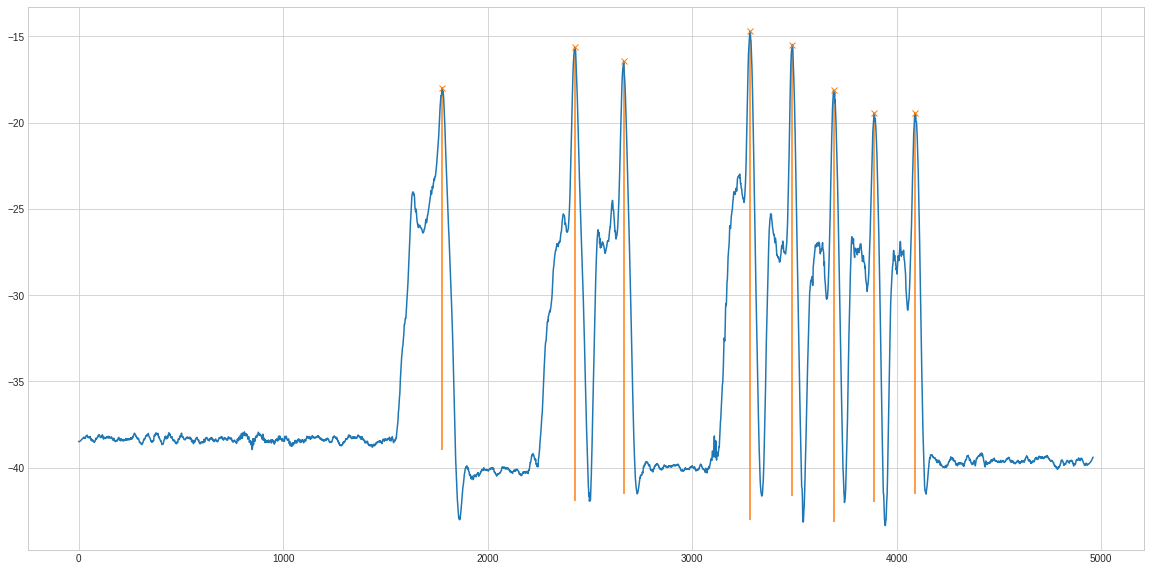

In [7]:
plt.figure(figsize=(20,10))
ax = plt.axes()

fn = "logs/2020-02-19T22:01:17.754841.csv"
start = 0
end = -1
step = 1

x = list(load(fn))[start:end:step]
print("expected: 8, calculated:", get_peaks(x))

plot(ax, x)

expected: 1, calculated: 1


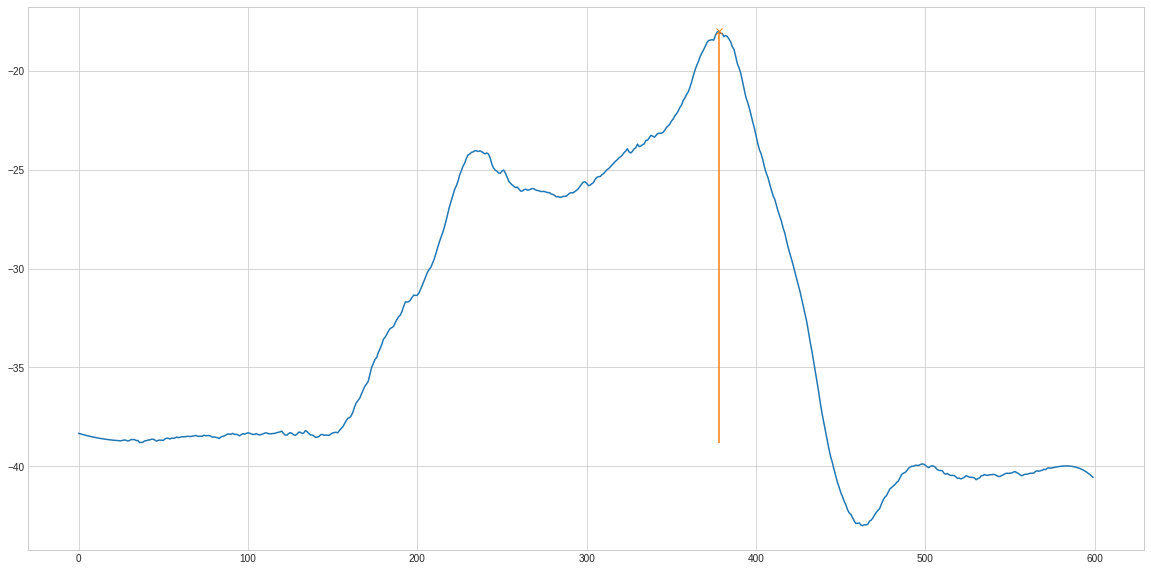

In [8]:
plt.figure(figsize=(20,10))
ax = plt.axes()

fn = "logs/2020-02-19T22:01:17.754841.csv"
start = 1400
end = 2000

x = list(load(fn))[start:end:step]
print("expected: 1, calculated:", get_peaks(x))

plot(ax, x)

expected: 2, calculated: 2


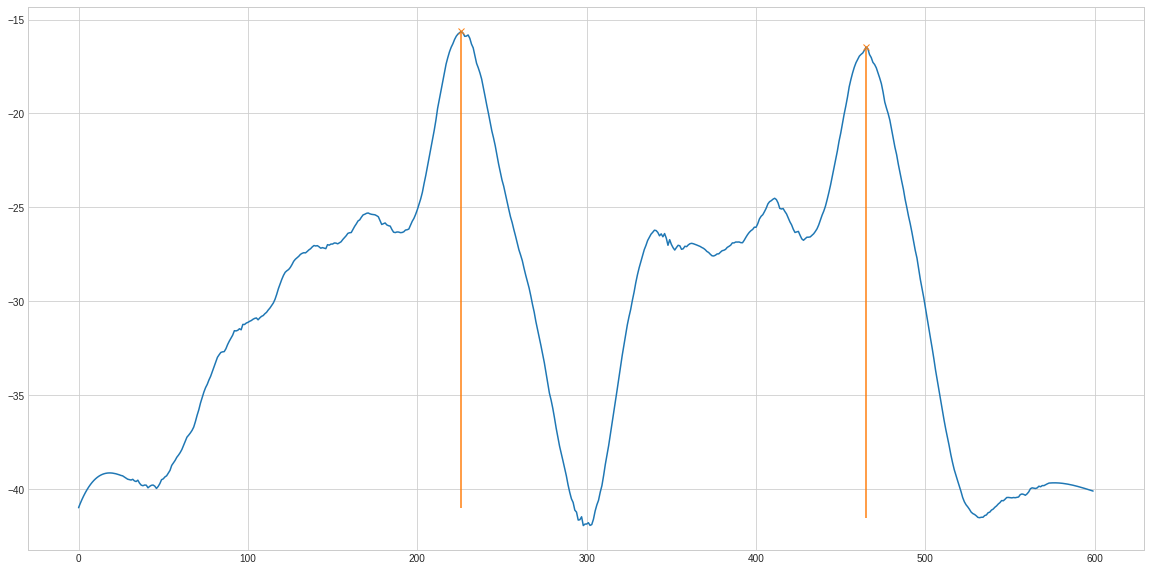

In [9]:
plt.figure(figsize=(20,10))
ax = plt.axes()

fn = "logs/2020-02-19T22:01:17.754841.csv"
start = 2200
end = 2800

x = list(load(fn))[start:end:step]
print("expected: 2, calculated:", get_peaks(x))

plot(ax, x)

expected: 5, calculated: 5


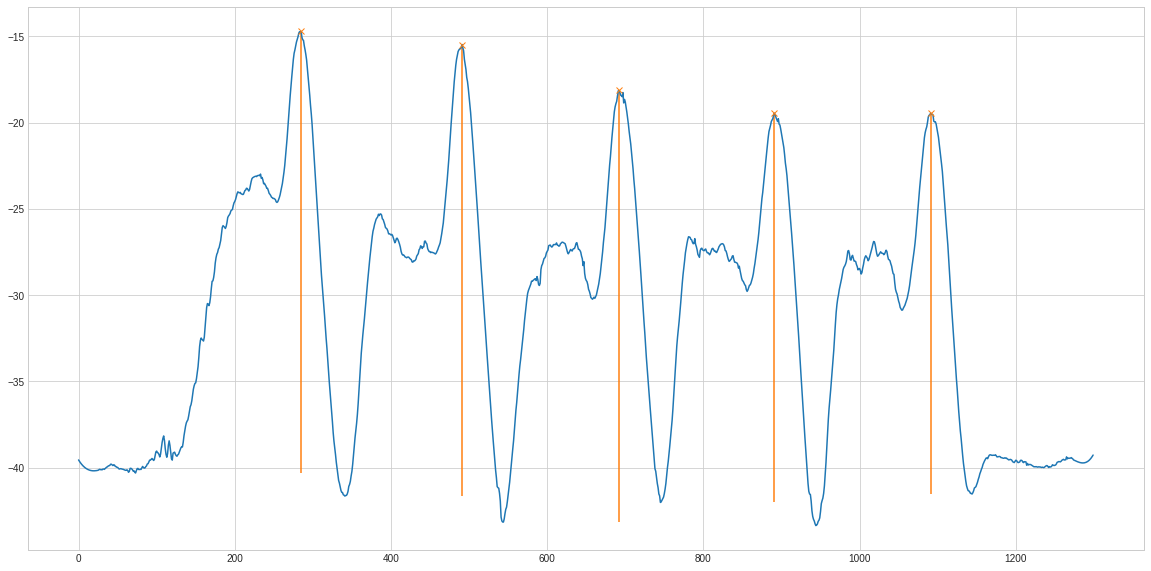

In [10]:
plt.figure(figsize=(20,10))
ax = plt.axes()

fn = "logs/2020-02-19T22:01:17.754841.csv"
start = 3000
end = 4300

x = list(load(fn))[start:end:step]
print("expected: 5, calculated:", get_peaks(x))

plot(ax, x)

expected: 100, calculated: 98


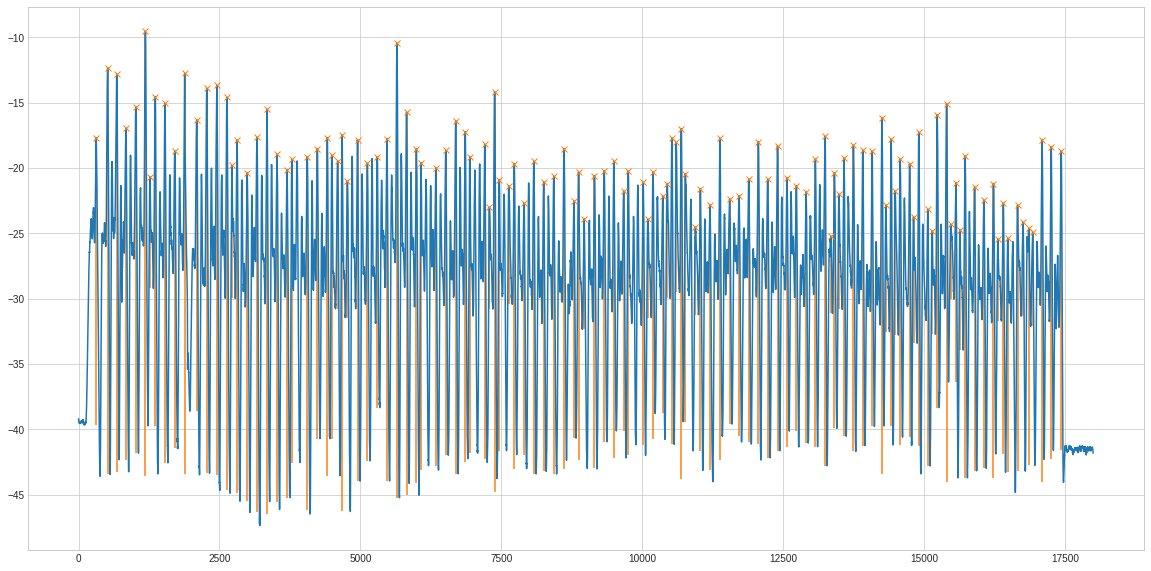

In [11]:
plt.figure(figsize=(20,10))
ax = plt.axes()

fn = "logs/2020-02-19T22:03:25.040967.csv"
start = 3000
end = 21000

x = list(load(fn))[start:end:step]
print("expected: 100, calculated:", get_peaks(x))

plot(ax, x)